MẠNG CNN CƠ BẢN

Như các bạn đã xem qua về bài Deep Learning cơ bản, ở phần này mình sẽ cùng các bạn tìm hiểu về một dạng mạng rất phổ biến, đó là CNN. 
Convolutional Neural Network, một mô hình mạng nơ-ron sử dụng trong việc xử lý ảnh.

Một số thuật ngữ trong CNN:
- Convolution: phép tích chập
- Pooling: phép gộp
- Stride: bước nhảy
- Padding: đệm
- Filter: bộ lọc
- Feature map: bản đồ đặc trưng
- ...

Trước hết, chúng ta hãy đi đến cụm từ Convolutions. Convolution là một phép toán toán học giữa hai hàm f và g, tạo ra một hàm mới.

Trong xử lý ảnh, Convolution là một phép toán giữa một ma trận và một ma trận nhỏ hơn, gọi là kernel, để tạo ra một ma trận mới. 
Ma trận nhỏ thường có kích thước 3x3 hoặc 5x5 với các giá trị được chọn cẩn thận.
một ma trận 3x3 thường được sử dụng để làm kernel là: 

[[1, 0, 1], [0, 1, 0], [1, 0, 1]]

Cách mà tích chập hoạt động:
- Lấy một ma trận đầu vào và một ma trận kernel (còn gọi là ma trận trọng số)
- Trượt kernel qua ma trận đầu vào, mỗi lần trượt sẽ thực hiện phép nhân giữa kernel và phần ma trận mà kernel đang trượt qua
- Kết quả của phép nhân này sẽ được cộng vào một ma trận kết quả

Ví dụ ta có 1 ma trận 5x5 và 1 kernel 3x3, ta sẽ trượt kernel qua ma trận 5x5 như sau:
- a1 a2 a3 a4 a5
- b1 b2 b3 b4 b5
- c1 c2 c3 c4 c5
- d1 d2 d3 d4 d5
- e1 e2 e3 e4 e5

Nhân kernel với phần ma trận 
- x1 x2 x3
- y1 y2 y3
- z1 z2 z3

Ta sẽ có kết quả là:
- q1 q2 q3
- q4 q5 q6
- q7 q8 q9

Với :
- q1 = a1*x1 + a2*x2 + a3*x3 + b1*y1 + b2*y2 + b3*y3 + c1*z1 + c2*z2 + c3*z3 
- q2 = a2*x1 + a3*x2 + a4*x3 + b2*y1 + b3*y2 + b4*y3 + c2*z1 + c3*z2 + c4*z3
- q3 = a3*x1 + a4*x2 + a5*x3 + b3*y1 + b4*y2 + b5*y3 + c3*z1 + c4*z2 + c5*z3
- ...

Coding:

In [1]:
import numpy as np
import random as rd
matrix5x5 = np.array([[rd.randint(0, 10) for i in range(5)] for j in range(5)])
matrix3x3 = np.array(  [[1, 0, 1],
                        [0, 1, 0],
                        [1, 0, 1]])
print("Ma trận đầu vào: \n",matrix5x5)
print("\nMa trận kernel: \n",matrix3x3)
def convolution(matrix5x5, matrix3x3):
    result = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            result[i][j] = np.sum(matrix5x5[i:i+3, j:j+3] * matrix3x3)
    return result
print("\nkết của của thuật toán trên: \n",convolution(matrix5x5, matrix3x3).astype(int))

# So sánh với hàm convolve2d của thư viện scipy
from scipy.signal import convolve2d
result = convolve2d(matrix5x5, matrix3x3, mode='valid')
print("\nKết quả của scipy: \n",result)
print("\nGiống hệt nhau:D \nMình cũng đã làm 1 thủ thuật là cast kiểu dữ liệu của thuật toán của mình thành int nên mới giống từng dấu phẩy") 

Ma trận đầu vào: 
 [[ 2  6  2  9  0]
 [ 6  8  0  7  6]
 [ 6 10  9  4  0]
 [ 2  0  9  0 10]
 [ 4  7  7  8  8]]

Ma trận kernel: 
 [[1 0 1]
 [0 1 0]
 [1 0 1]]

kết của của thuật toán trên: 
 [[27 29 18]
 [27 24 29]
 [26 38 24]]

Kết quả của scipy: 
 [[27 29 18]
 [27 24 29]
 [26 38 24]]

Giống hệt nhau:D 
Mình cũng đã làm 1 thủ thuật là cast kiểu dữ liệu của thuật toán của mình thành int nên mới giống từng dấu phẩy


Ứng dụng của convolution trong xử lý ảnh:
- Ta có thể sử dụng convolution để tìm được cường độ của một điểm ảnh dựa trên các điểm ảnh xung quanh nó. Nó tương tự việc ta đạo hàm giá trị của từng vùng nhỏ trong ảnh.

Ngoài ra, tôi sẽ nói thêm về lí do tại sao người ta thường chỉnh ảnh về grayscale trước khi convolution.
Như chúng ta được biết, ảnh lưu trữ thông tin dưới ba kênh màu RGB. Mỗi kênh màu sẽ có một ma trận màu tương ứng.
Các thang màu này sẽ được chuyển về giá trị từ 0 đến 255. Khi chúng ta thực hiện convolution trên ảnh màu, chúng ta sẽ thực hiện convolution trên từng kênh màu.

Do đó, khi chuyển về grayscale, chúng ta sẽ giảm số lượng ma trận cần thực hiện convolution từ 3 xuống 1. Tức là từ 256x256x3 -> 256x256x1.
Điều này giúp giảm đáng kể thời gian thực hiện convolution.

Một trong những điều phổ biến đối với các bạn sử dụng thư viện cv2 để đọc ảnh, sau đó dung plt.imshow để hiển thị ảnh là ảnh thường có xu hướng bị xanh. 
Điều này là do cv2 đọc ảnh theo thứ tự BGR, còn plt.imshow hiển thị theo thứ tự RGB, do đó ảnh sẽ bị xanh. 
Để giải quyết vấn đề này, ta có thể sử dụng cv2.cvtColor để chuyển ảnh từ BGR sang RGB trước khi hiển thị.

Ví dụ:

import cv2 ( nếu chưa có thư viện thì !pip install opencv-python trong 1 kernel của notebook khác, chú ý chọn môi trường python trước :D)

import matplotlib.pyplot as plt ( chưa có thì lên pypi mà download )

img = cv2.imread(PATH CỦA ẢNH) ( nhớ để đường dẫn của ảnh trong dấu '')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

plt.show()

Dưới đây là ví dụ:

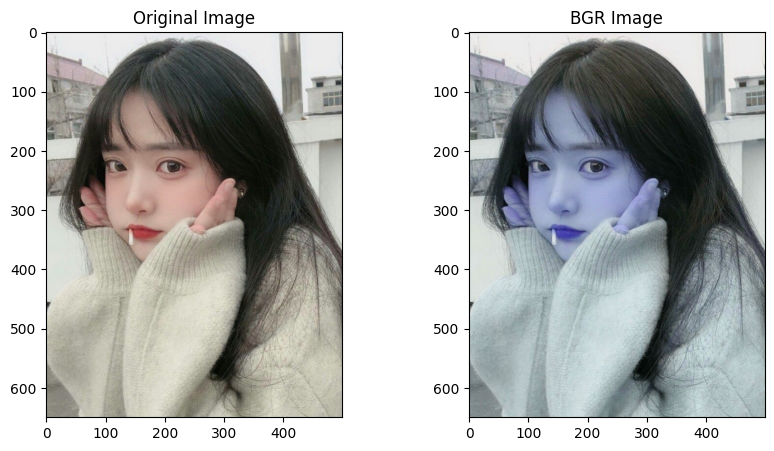

In [2]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('image.jpg')
# Plot 2 hình ảnh, 1 hình ảnh gốc và 1 hình ảnh theo kênh màu rgb
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('BGR Image')
plt.show()

OKE, giờ mình sẽ thử áp dụng thuật toán convolution vào hình ảnh.
- Trước tiên, mình sẽ chuyển hình ảnh sang ảnh xám.
- Sau đó, mình sẽ thử áp dụng thuật toán convolution vào ảnh xám đó.
- ngoài ra có một thuật ngữ hay được dùng trong các mạng CNN, đó là padding:
- Padding là một kỹ thuật thêm các hàng và cột vào ảnh gốc để tăng kích thước của ảnh.
- Padding có thể thêm vào ảnh ở 4 phía: top, bottom, left, right.
- Padding thường được sử dụng để giữ nguyên kích thước của ảnh sau khi qua các lớp convolution với cú pháp: padding='same'.

Chúng ta hãy thử liệt kê xem các các kernel phổ biến trong xử lý ảnh:
1. Kernel detect edges: [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], thường được sử dụng để phát hiện biên cạnh
2. Kernel sharpen: [[0, -1, 0], [-1, 5, -1], [0, -1, 0]], thường được sử dụng để làm nổi bật đặc trưng
3. Kernel blur: [[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9, thường được sử dụng để làm mờ ảnh
4. Kernel emboss: [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], thường được sử dụng để tạo hiệu ứng 3D

Lí do edge detection kernel là [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]] là vì:
- Nếu 1 pixel giữa 8 pixel xung quanh nó thì nó là biên cạnh
- số -1 ở 8 pixel xung quanh nó là để giảm giá trị của 8 pixel xung quanh nó

Lí do sharpen kernel là [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] là vì:
- lấy 0 ở 4 góc để giảm giá trị của 4 góc
- 4 cạnh theo trục vuông góc có giá trị -1 để giảm giá trị của 4 cạnh
- số 5 ở pixel giữa để tăng giá trị của pixel giữa, có thể thay đổi số 5 thành số khác để tăng giảm giá trị của pixel giữa, nhưng số 5 là số phổ biến nhất, mình cũng không biết tại sao :D

Lí do blur kernel là [[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9 là vì:
- mình chia cho 9 để giảm giá trị của 9 pixel xung quanh nó về 1/9 giá trị ban đầu, do đó ảnh sẽ mờ đi, nghe lỏd lỏd thế thôi chứ mình thấy khá hợp lý, thường thì xài 2 tới 3 lớp là khử nhiễu kha khá, tuy nhiên sẽ làm ảnh bị mờ đi

Lí do emboss kernel là [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]] là vì:
- mình thấy lí thuyết trên wikipedia là mình sẽ tăng giảm các giá trị pixel đối xứng với pixel ở giữa với cùng 1 giá trị
- điều này khiến tạo hiệu ứng lồi lõm, tạo chiều sâu cho ảnh, mình thấy khá hợp lý :D

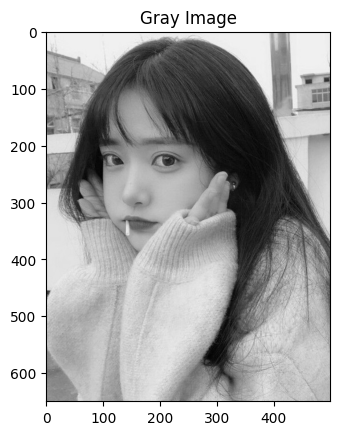

In [3]:
# ví dụ bước 1: chuyển ảnh màu sang ảnh xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.show()

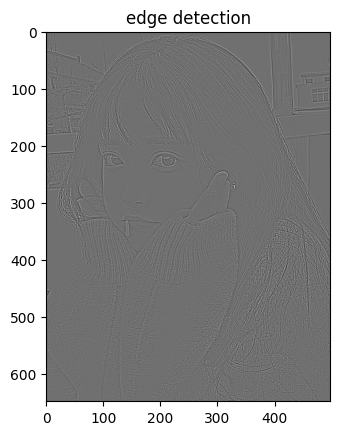

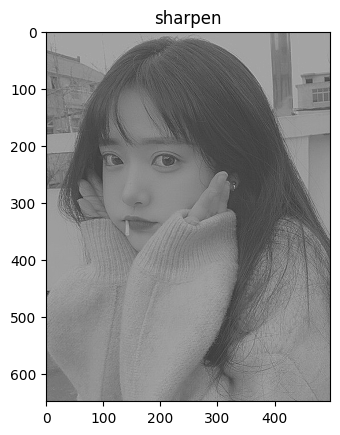

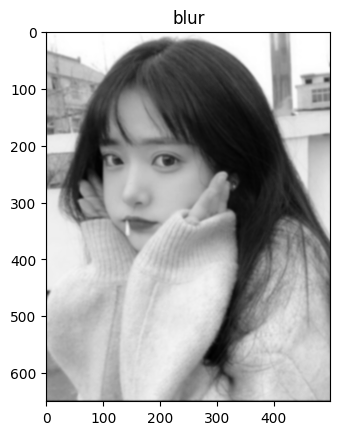

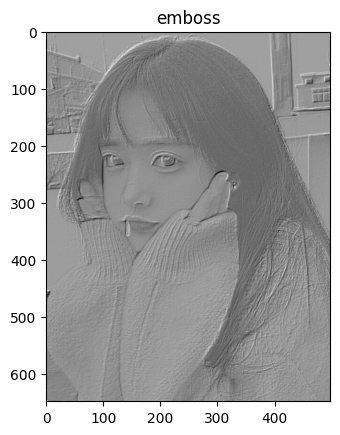

In [4]:
# ví dụ bước 2: áp dụng thuật toán convolution vào ảnh xám
list_kernels = {"edge detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
                "sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
                "blur": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9,
                "emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])}
for kernel_name, kernel in list_kernels.items():
    if kernel_name == "blur":
        # riêng thằng blur mình sẽ áp dụng 3 lần để mờ ảnh nhiều hơn, thế cho chắc :D
        result = convolve2d(gray_image, kernel, mode='same')
        result = convolve2d(result, kernel, mode='same')
        result = convolve2d(result, kernel, mode='same')
        plt.imshow(result, cmap='gray')
        plt.title(kernel_name)
        plt.show()
    else:  
        result = convolve2d(gray_image, kernel, mode='valid')
        plt.imshow(result, cmap='gray')
        plt.title(kernel_name)
        plt.show()


Tiếp theo, chúng ta hãy nói về hàm maxpooling. Hàm này sẽ giúp giảm kích thước của ảnh mà vẫn giữ được thông tin quan trọng.

Cụ thể, hàm maxpooling sẽ chia ảnh thành các ô nhỏ và lấy giá trị lớn nhất trong mỗi ô đó.

ví dụ: ảnh 8x8 sau khi áp dụng maxpooling với kernel 2x2 sẽ trở thành 4x4. Trong một ô 2x2, giá trị lớn nhất sẽ được chọn để đại diện cho ô đó.
Giả sử có ma trận 4x4 như sau:

[[1, 2, 3, 4],

 [5, 6, 7, 8],
 
 [9, 10, 11, 12],
 
 [13, 14, 15, 16]]
 
nếu áp dụng maxpooling với kernel 2x2, ta sẽ được ma trận 2x2 như sau:
[[6, 8],
 [14, 16]] 
 
Do trong 1,2,5,6 thì 6 là lớn nhất, trong 3,4,7,8 thì 8 là lớn nhất, và cứ như vậy.

Với maxpooling, ta có tham số stride, tham số này sẽ quyết định bước nhảy của kernel khi duyệt qua ảnh. Ví dụ, nếu stride = 2, kernel sẽ nhảy 2 ô mỗi lần duyệt.

Nếu stride = 1, kernel sẽ nhảy 1 ô mỗi lần duyệt. Giả sử với cùng ma trận 4x4 như trên, nếu stride = 2, ta sẽ được ma trận 2x2 như sau:

[[6, 8],

[14, 16]]

Từ đó ta suy ra kích thước của ảnh sau khi áp dụng maxpooling sẽ là:
- (kích thước ảnh - kích thước kernel) / stride + 1
+ ví dụ: ảnh 8x8, kernel 2x2, stride = 2, kích thước ảnh sau khi maxpooling sẽ là:
- (8 - 2) / 2 + 1 = 4 (làm tròn lên)
- ví dụ: ảnh 4x4, kernel 2x2, stride = 2, kích thước ảnh sau khi maxpooling sẽ là:
- (4 - 2) / 2 + 1 = 2 (làm tròn lên)
- ví dụ: ảnh 4x4, kernel 2x2, stride = 1, kích thước ảnh sau khi maxpooling sẽ là:
- (4 - 2) / 1 + 1 = 3

Nhiều trường hợp ta cũng sử dụng average pooling để giảm kích thước của ảnh, giảm chiều dài của vector đầu vào cho mô hình học máy. Nó cũng tương tự max pooling nhưng thay vì lấy giá trị lớn nhất thì ta lấy giá trị trung bình của các giá trị trong vùng cần lấy.

Sau khi bóc tách CNN, ta có thể thấy rằng nó bao gồm các lớp sau:
- Lớp Convolutional: Lớp này sẽ thực hiện việc tích chập giữa ảnh đầu vào và các bộ lọc (kernel) để tạo ra các feature maps.
- Feature maps: Là các ma trận 2 chiều chứa các feature của ảnh đầu vào, được tạo ra bởi lớp Convolutional, chứa các thông tin về cạnh, texture, màu sắc, v.v. được cho là đặc trung của ảnh.
- Lớp Activation: Lớp này sẽ áp dụng hàm kích hoạt (activation function) để tạo ra các feature maps phi tuyến tính.
- Lớp Pooling: Lớp này sẽ thực hiện việc giảm kích thước của feature maps bằng cách lấy giá trị lớn nhất hoặc trung bình trong một vùng cụ thể.
- Lớp Fully Connected: Lớp này sẽ kết nối tất cả các neuron của lớp trước với tất cả các neuron của lớp sau.
- Lớp Output: Lớp này sẽ tạo ra dự đoán cuối cùng dựa trên các giá trị đầu ra của lớp trước, activation function thường sẽ là softmax cho bài toán phân loại.

Tiếp theo đây, chúng ta sẽ cùng tạo ra một mạng CNN đơn giản để phân loại ảnh trong bộ dữ liệu MNIST.

Bây giờ mình sẽ thử xây dựng một model CNN đơn giản bằng tensorflow.

Import các thư viện cần sử dụng: 

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy


Sử dụng GPU để train cho nhanh

In [6]:

physical_devices = tf.config.experimental.list_physical_devices('GPU')
physical_devices
    

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Đưa dữ liệu mnist nổi tiếng vào model:
- Ở đây mình sẽ sử dụng bộ dữ liệu MNIST, bộ dữ liệu này bao gồm 60,000 ảnh dùng để train và 10,000 ảnh dùng để test.
- Mỗi ảnh là 1 ảnh xám với kích thước 28x28 pixel.
- Nội dung của ảnh là các chữ số từ 0 đến 9 đã được augmented và chuẩn hóa.
- Augmented: ảnh đã được xử lý để tạo ra các ảnh mới từ ảnh gốc, như xoay, phóng to, thu nhỏ, ... giúp cho mô hình học tốt hơn, tránh overfitting.
- Chuẩn hóa: ảnh đã được chia cho 255 để giá trị các pixel nằm trong khoảng [0, 1], giúp cho việc tính toán nhanh hơn.
- Hàm to_categorical: chuyển label từ dạng số sang dạng one-hot vector, ví dụ label 3 sẽ được chuyển thành [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], với 10 là số lượng class, 1 là vị trí của số 3.
- Đây là một dạng chuẩn hóa label để mô hình học tốt hơn.

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Kích thước đầu vào tập train:  (60000, 28, 28, 1)
Kích thước đầu ra tập label train:  (60000, 10)
Kích thước đầu vào tập test:  (10000, 28, 28, 1)
Kích thước đầu ra tập label test:  (10000, 10)
10 ảnh đầu tiên trong tập train kèm theo label: 


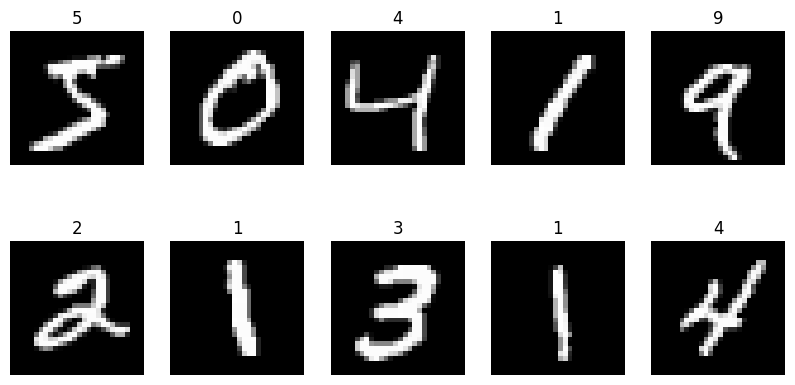

In [8]:
print("Kích thước đầu vào tập train: ",x_train.shape)
print("Kích thước đầu ra tập label train: ",y_train.shape)
print("Kích thước đầu vào tập test: ",x_test.shape)
print("Kích thước đầu ra tập label test: ",y_test.shape)
print("10 ảnh đầu tiên trong tập train kèm theo label: ")
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 8s 5ms/step - loss: 0.1581 - accuracy: 0.9511 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0402 - val_accuracy: 0.9863
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0274 - val_accuracy: 0.9923
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0279 - val_accuracy: 0.9922
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0323 - val_accuracy: 0.9911
Epoch 

OKE, sau khi huấn luyện mô hình, tôi sẽ thử chọn một ảnh số trên mạng và thử test :D

1/1 [==============================] - 0s 115ms/step
Dự đoán của ảnh:  1


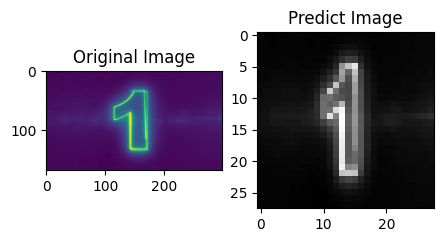

In [11]:
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
img1_ = cv2.resize(img1, (28, 28))
img1_ = img1_.reshape(1, 28, 28, 1)
img1_ = img1_.astype('float32') / 255
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img1_ .reshape(28, 28), cmap='gray')
plt.title('Predict Image')
print("Dự đoán của ảnh: ",np.argmax(model.predict(img1_)))

Chuẩn đét ae ạ, test phát nữa nào

1/1 [==============================] - 0s 20ms/step
Dự đoán của ảnh:  7


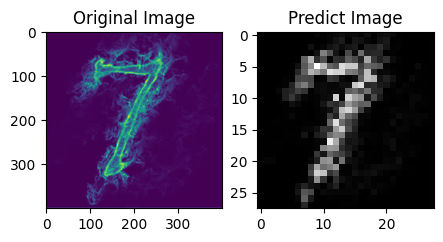

In [12]:
img7 = cv2.imread('7.jpg', cv2.IMREAD_GRAYSCALE)
img7_ = cv2.resize(img7, (28, 28))
img7_ = img7_.reshape(1, 28, 28, 1)
img7_ = img7_.astype('float32') / 255
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(img7)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img7_ .reshape(28, 28), cmap='gray')
plt.title('Predict Image')
print("Dự đoán của ảnh: ",np.argmax(model.predict(img7_)))